# Notebook Initilization

In [2]:
# System Libraries #
import os
import rdflib
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

from pyvis.network import Network

# Local Libraries #

# Project folder
NOTEBOOKS_FOLDER = os.getcwd()
os.chdir("..")  # Go back to project folder, assuming "notebooks" as current working directory
PROJECT_FOLDER = os.getcwd()

# WikiGraphs Folder
os.chdir("wikigraphs")  # go to WikiGraphs source code folder
WIKIGRAPHS_FOLDER = os.getcwd()
from wikigraphs.data import (io_tools,
                             paired_dataset)

os.chdir("..")  # go back to project folder
print("Project Folder:", PROJECT_FOLDER)
print("WikiGraphs Folder:", WIKIGRAPHS_FOLDER)
print("Notebooks Folder:", NOTEBOOKS_FOLDER)

Project Folder: /home/kleptotrace/Projects/git/llmgrapher
WikiGraphs Folder: /home/kleptotrace/Projects/git/llmgrapher/wikigraphs
Notebooks Folder: /home/kleptotrace/Projects/git/llmgrapher/notebooks


# Dataset Loading

In [2]:
os.chdir(WIKIGRAPHS_FOLDER)  # chdir to wikigraphs folder due to working with wikigraphs datasets

## Non-Parsed Graph-Text Pairs (using test set)

In [3]:
# Loading Graph-Text pairs
pairs_generator = io_tools.read_pairs_from_gzip_txt_file("data/wikigraphs/max256/test.gz")
pairs = [pair for pair in pairs_generator]

In [4]:
len(pairs)

43

In [5]:
# Example of a pair
pair = pairs[1]
print("___Graph Node___")
print("Center node:", pair.center_node)
print("Title:", pair.title)
print("Edges:")
for edge in pair.edges:
    print(edge)
print("\n\n")
print("___Text___")
print(pair.text)

___Graph Node___
Center node: ns/m.01wyhf
Title: Du_Fu
Edges:
ns/m.09ghg8r	ns/people.deceased_person.date_of_death	"1578"	.
ns/m.09ghg8r	ns/common.topic.notable_types	ns/m.01xryvt	.
ns/m.09ghg8r	ns/common.topic.description	"Xu Zhongxing was a Chinese litterateur of the Ming Dynasty. He was one of the Latter Seven Masters. He completed the Jinshi level of the Imperial Examination in 1550. Later he was appointed as Xingbu Zhushi, and became Buzhengshi of Jiangxi at last.\nMost of his poems portrayed the beautiful landscape and social customs of various places, and expressed his homesickness. Xu's poems were strongly influenced by Du Fu, but lack of profoundness and forcefulness."	.
ns/m.09ghg8r	ns/people.person.gender	ns/m.05zppz	.
ns/m.09ghg8r	key/wikipedia.en	"Xu_Zhongxing"	.
ns/m.09ghg8r	ns/type.object.name	"Xu Zhongxing"	.
ns/m.09ghg8r	ns/influence.influence_node.influenced_by	ns/m.01wyhf	.
ns/m.03mc_qq	ns/location.location.area	"1041.0"	.
ns/m.03mc_qq	key/wikipedia.en	"Gongyi"	.
ns/

## Parsed Graph-Text Pairs (using train set)

In [6]:
dataset = paired_dataset.ParsedDataset(
               subset = 'train',
               shuffle_data = False,
               data_dir = None,
               version = 'max256')

In [7]:
parsed_pairs = [parsed_pair for parsed_pair in dataset]

In [8]:
len(parsed_pairs)

23431

In [9]:
parsed_pair = parsed_pairs[0]

In [10]:
# Show non-private and non-magic attributes
print(type(pair))
[attr for attr in dir(pair) if not attr.startswith("_")]

<class 'wikigraphs.data.io_tools.GraphTextPair'>


['center_node', 'count', 'edges', 'index', 'text', 'title']

In [11]:
# Show non-private and non-magic attributes
print(type(parsed_pair))
[attr for attr in dir(parsed_pair) if not attr.startswith("_")]

<class 'wikigraphs.data.paired_dataset.ParsedGraphTextPair'>


['center_node', 'count', 'graph', 'index', 'text', 'title']

__NOTE__: Parsed and non-parsed graph-text pairs differ in that the first have their graph edges parsed to Graph objects

In [12]:
# Restore back to Project Folder
os.chdir("..")

# Graph

In [13]:
# Creating a Graph...

# ...using the Pair's Edges
g = paired_dataset.Graph.from_edges(pair.edges)

In [14]:
g.edges()

[(0, 1, 'ns/people.deceased_person.date_of_death'),
 (0, 2, 'ns/common.topic.notable_types'),
 (0, 3, 'ns/common.topic.description'),
 (0, 4, 'ns/people.person.gender'),
 (0, 5, 'key/wikipedia.en'),
 (0, 6, 'ns/type.object.name'),
 (0, 7, 'ns/influence.influence_node.influenced_by'),
 (8, 9, 'ns/location.location.area'),
 (8, 10, 'key/wikipedia.en'),
 (8, 7, 'ns/location.location.people_born_here'),
 (8, 11, 'ns/topic_server.population_number'),
 (8, 12, 'ns/common.topic.description'),
 (8, 13, 'ns/common.topic.alias'),
 (8, 10, 'ns/type.object.name'),
 (14, 15, 'key/wikipedia.en'),
 (14, 16, 'ns/type.object.name'),
 (14, 17, 'ns/people.person.date_of_birth'),
 (14, 18, 'ns/people.person.profession'),
 (14, 7, 'ns/influence.influence_node.influenced_by'),
 (14, 19, 'ns/common.topic.description'),
 (14, 4, 'ns/people.person.gender'),
 (14, 20, 'ns/people.deceased_person.date_of_death'),
 (21, 22, 'ns/type.object.name'),
 (21, 23, 'key/wikipedia.en'),
 (21, 2, 'ns/common.topic.notable_ty

In [15]:
g.nodes()

['ns/m.09ghg8r',
 '"1578"',
 'ns/m.01xryvt',
 '"Xu Zhongxing was a Chinese litterateur of the Ming Dynasty. He was one of the Latter Seven Masters. He completed the Jinshi level of the Imperial Examination in 1550. Later he was appointed as Xingbu Zhushi, and became Buzhengshi of Jiangxi at last.\\nMost of his poems portrayed the beautiful landscape and social customs of various places, and expressed his homesickness. Xu\'s poems were strongly influenced by Du Fu, but lack of profoundness and forcefulness."',
 'ns/m.05zppz',
 '"Xu_Zhongxing"',
 '"Xu Zhongxing"',
 'ns/m.01wyhf',
 'ns/m.03mc_qq',
 '"1041.0"',
 '"Gongyi"',
 '"790000"',
 '"Gongyi, formerly Gong County, is a county-level city belonging to the city of Zhengzhou in Henan province, China. It has a population of 790,000 people and an area of 1,041 square kilometres.\\nGongyi is located at in the middle of Henan province, on the northern side of Mount Song. The Yellow River runs through the northern part of the city. Zhengzhou c

## Convert to Pandas Dataframe

In [16]:
df = pd.DataFrame(g.edges(), columns=["src", "tgt", "edge"])
# NOTE: "src" corresponds to the ID of the "subject" node and
#       "tgt" corresponds to the ID of the "object" node.

In [17]:
# Append the values of the nodes as new columns
df["subject"] = df["src"].apply(lambda node_id: g.nodes()[node_id])
df["object"] = df["tgt"].apply(lambda node_id: g.nodes()[node_id])

In [18]:
df

,src,tgt,edge,subject,object
0,0,1,ns/people.deceased_person.date_of_death,ns/m.09ghg8r,"""1578"""
1,0,2,ns/common.topic.notable_types,ns/m.09ghg8r,ns/m.01xryvt
2,0,3,ns/common.topic.description,ns/m.09ghg8r,"""Xu Zhongxing was a Chinese litterateur of the..."
3,0,4,ns/people.person.gender,ns/m.09ghg8r,ns/m.05zppz
4,0,5,key/wikipedia.en,ns/m.09ghg8r,"""Xu_Zhongxing"""
...,...,...,...,...,...
92,39,75,ns/type.object.name,ns/m.026d4k,"""Li Shangyin"""
93,39,2,ns/common.topic.notable_types,ns/m.026d4k,ns/m.01xryvt
94,39,4,ns/people.person.gender,ns/m.026d4k,ns/m.05zppz
95,39,76,ns/people.person.date_of_birth,ns/m.026d4k,"""0813"""


## Creating subject-predicate-object triplets

In [19]:
# Create a subject, predicate, object DataFrame
spo_df = df[["subject", "edge", "object"]]
spo_df.rename(columns={"edge":"predicate"}, inplace=True)
spo_df[:10]

/tmp/ipykernel_1879983/77018946.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  spo_df.rename(columns={"edge":"predicate"}, inplace=True)


,subject,predicate,object
0,ns/m.09ghg8r,ns/people.deceased_person.date_of_death,"""1578"""
1,ns/m.09ghg8r,ns/common.topic.notable_types,ns/m.01xryvt
2,ns/m.09ghg8r,ns/common.topic.description,"""Xu Zhongxing was a Chinese litterateur of the..."
3,ns/m.09ghg8r,ns/people.person.gender,ns/m.05zppz
4,ns/m.09ghg8r,key/wikipedia.en,"""Xu_Zhongxing"""
5,ns/m.09ghg8r,ns/type.object.name,"""Xu Zhongxing"""
6,ns/m.09ghg8r,ns/influence.influence_node.influenced_by,ns/m.01wyhf
7,ns/m.03mc_qq,ns/location.location.area,"""1041.0"""
8,ns/m.03mc_qq,key/wikipedia.en,"""Gongyi"""
9,ns/m.03mc_qq,ns/location.location.people_born_here,ns/m.01wyhf


## Creating source-target-edge DataFrame, maintaining object name

In [20]:
ste_df = df.drop(['subject'], axis=1)
ste_df[:5]

,src,tgt,edge,object
0,0,1,ns/people.deceased_person.date_of_death,"""1578"""
1,0,2,ns/common.topic.notable_types,ns/m.01xryvt
2,0,3,ns/common.topic.description,"""Xu Zhongxing was a Chinese litterateur of the..."
3,0,4,ns/people.person.gender,ns/m.05zppz
4,0,5,key/wikipedia.en,"""Xu_Zhongxing"""


In [21]:
# Re-arrange columns
ste_df = ste_df[["src", "edge", "tgt", "object"]]
ste_df[:2]

,src,edge,tgt,object
0,0,ns/people.deceased_person.date_of_death,1,"""1578"""
1,0,ns/common.topic.notable_types,2,ns/m.01xryvt


## Filtering Example

### Viewing Object Names

In [22]:
ste_df[ste_df["edge"] == "ns/type.object.name"]

,src,edge,tgt,object
5,0,ns/type.object.name,6,"""Xu Zhongxing"""
13,8,ns/type.object.name,10,"""Gongyi"""
15,14,ns/type.object.name,16,"""Su Shi"""
22,21,ns/type.object.name,22,"""Walter Lowenfels"""
32,27,ns/type.object.name,29,"""Selected Poems of Du Fu"""
38,18,ns/type.object.name,32,"""Poet"""
40,2,ns/type.object.name,35,"""Author"""
54,7,ns/type.object.name,45,"""Du Fu"""
66,48,ns/type.object.name,53,"""Charles Bukowski"""
71,47,ns/type.object.name,57,"""Du Fu Thatched Cottage"""


### Showing Unique Predicates/Edges

In [23]:
pd.Series(df.edge.unique())

0               ns/people.deceased_person.date_of_death
1                         ns/common.topic.notable_types
2                           ns/common.topic.description
3                               ns/people.person.gender
4                                      key/wikipedia.en
5                                   ns/type.object.name
6             ns/influence.influence_node.influenced_by
7                             ns/location.location.area
8                 ns/location.location.people_born_here
9                     ns/topic_server.population_number
10                                ns/common.topic.alias
11                       ns/people.person.date_of_birth
12                          ns/people.person.profession
13                          ns/book.written_work.author
14     ns/people.profession.people_with_this_profession
15                                    ns/type.object.id
16              ns/freebase.type_profile.instance_count
17                   ns/freebase.object_hints.be

In [24]:
pd.Series(df.edge.unique()).str.rsplit(".").str[-1]

0                   date_of_death
1                   notable_types
2                     description
3                          gender
4                              en
5                            name
6                   influenced_by
7                            area
8                people_born_here
9               population_number
10                          alias
11                  date_of_birth
12                     profession
13                         author
14    people_with_this_profession
15                             id
16                 instance_count
17                      best_hrid
18                     influenced
19                 place_of_birth
20                  works_written
21                 place_of_death
22                      namesakes
23                  height_meters
24                  daylife_topic
25                    named_after
26                geocode_checked
dtype: object

# Visualization

## Using NetworkX to Visualize Graph

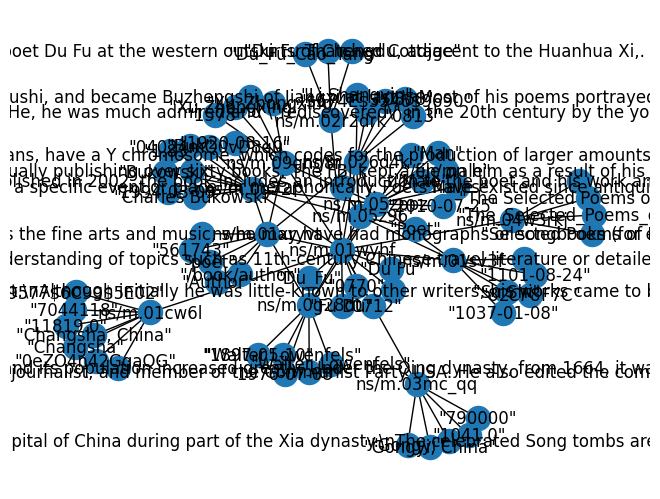

In [25]:
# Visualize graph using subject-predicate-object dataframe
G_spo = nx.from_pandas_edgelist(spo_df, source='subject', edge_attr='predicate', target="object") #, create_using=nx.DiGraph())
nx.draw(G_spo, with_labels=True) #, node_size=500, font_size=10)
plt.show()

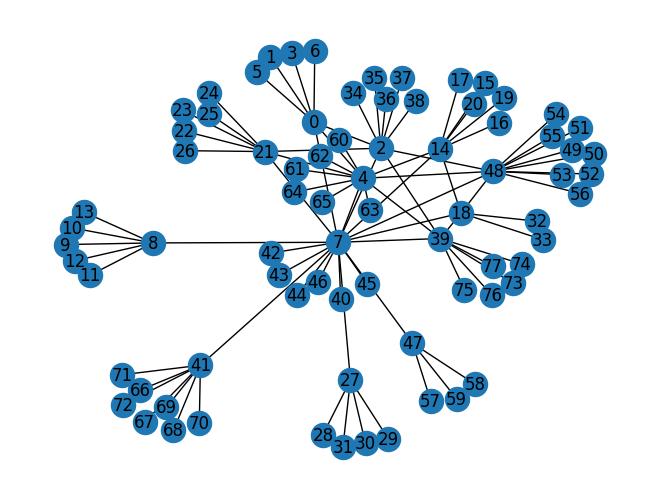

In [26]:
# Visualize graph using source-target-edge dataframe
G_ste = nx.from_pandas_edgelist(ste_df, source='src', edge_attr='edge', target="tgt") #, create_using=nx.DiGraph())
nx.draw(G_ste, with_labels=True) #, node_size=500, font_size=10)
plt.show()

## Using Pyvis to Visualize Graph

In [27]:
# Change current working directory inside notebooks folder in order for net.show() to work
os.chdir(NOTEBOOKS_FOLDER)

In [28]:
# Helper Function for visualizing the graph
EDGE_LABEL_COLUMN_NAME = "predicate"
def show_pyvis_graph(G):
    show_pyvis_graph.counter += 1
    net = Network(
        notebook=True,
        bgcolor="#1a1a1a",
        cdn_resources="remote",
        height="500px",
        width="100%",
        select_menu=True,
        font_color="#cccccc",
        # filter_menu=True,
    )

    net.from_nx(G)

    # Assign networkx graph edges labels to pyvis edges labels
    for edge in net.edges:
        edge["label"] = edge[EDGE_LABEL_COLUMN_NAME]
    
    net.repulsion(node_distance=150, spring_length=400)
    # net.barnes_hut(gravity=-18100, central_gravity=5.05, spring_length=380)
    # net.show_buttons(filter_=["physics"])
    
    return net.show(f"temp-graph-{show_pyvis_graph.counter}.html", notebook=True)
show_pyvis_graph.counter = 0

In [29]:
G = G_spo
net = Network(
    notebook=True,
    bgcolor="#1a1a1a",
    cdn_resources="remote",
    height="500px",
    width="100%",
    select_menu=True,
    font_color="#cccccc",
    # filter_menu=True,
)

net.from_nx(G)

# Assign networkx graph edges labels to pyvis edges labels
for edge in net.edges:
    edge["label"] = edge["predicate"]

net.repulsion(node_distance=150, spring_length=400)
# net.barnes_hut(gravity=-18100, central_gravity=5.05, spring_length=380)
net.show_buttons(filter_=["physics"])

net.show(f"temp-graph-{show_pyvis_graph.counter}.html", notebook=True)

temp-graph-0.html


In [30]:
net.edges[0]

{'predicate': 'ns/people.deceased_person.date_of_death',
 'width': 1,
 'from': 'ns/m.09ghg8r',
 'to': '"1578"',
 'label': 'ns/people.deceased_person.date_of_death'}

### Unfiltered SPO Graph Visualization

In [31]:
show_pyvis_graph(G_spo)

temp-graph-1.html


### Filtering Data for Better Visualization

#### Filtered SPO Graph (Truncated Description)

In [32]:
# Truncating description text to 20 characters
spo_trunc_desc_df = spo_df.copy()
spo_trunc_desc_df.loc[spo_trunc_desc_df.query("predicate == 'ns/common.topic.description'").index, "object"] = (
    spo_df["object"].str[:20]
)
spo_trunc_desc_df[:10]

,subject,predicate,object
0,ns/m.09ghg8r,ns/people.deceased_person.date_of_death,"""1578"""
1,ns/m.09ghg8r,ns/common.topic.notable_types,ns/m.01xryvt
2,ns/m.09ghg8r,ns/common.topic.description,"""Xu Zhongxing was a"
3,ns/m.09ghg8r,ns/people.person.gender,ns/m.05zppz
4,ns/m.09ghg8r,key/wikipedia.en,"""Xu_Zhongxing"""
5,ns/m.09ghg8r,ns/type.object.name,"""Xu Zhongxing"""
6,ns/m.09ghg8r,ns/influence.influence_node.influenced_by,ns/m.01wyhf
7,ns/m.03mc_qq,ns/location.location.area,"""1041.0"""
8,ns/m.03mc_qq,key/wikipedia.en,"""Gongyi"""
9,ns/m.03mc_qq,ns/location.location.people_born_here,ns/m.01wyhf


In [33]:
# NetworkX Graph created from filtered DataFrame
G_spo_trunc_desc = nx.from_pandas_edgelist(spo_trunc_desc_df, source='subject', edge_attr='predicate', target="object") #, create_using=nx.DiGraph())

show_pyvis_graph(G_spo_trunc_desc)

temp-graph-2.html


#### Filtered SPO Graph (Only Object Name Predicates)

In [34]:
spo_obj_names_df = spo_df.query("predicate == 'ns/type.object.name'")
spo_obj_names_df

,subject,predicate,object
5,ns/m.09ghg8r,ns/type.object.name,"""Xu Zhongxing"""
13,ns/m.03mc_qq,ns/type.object.name,"""Gongyi"""
15,ns/m.01sv3f,ns/type.object.name,"""Su Shi"""
22,ns/m.0g28dt,ns/type.object.name,"""Walter Lowenfels"""
32,ns/m.04w3rkj,ns/type.object.name,"""Selected Poems of Du Fu"""
38,ns/m.05z96,ns/type.object.name,"""Poet"""
40,ns/m.01xryvt,ns/type.object.name,"""Author"""
54,ns/m.01wyhf,ns/type.object.name,"""Du Fu"""
66,ns/m.0g72r,ns/type.object.name,"""Charles Bukowski"""
71,ns/m.02r2drk,ns/type.object.name,"""Du Fu Thatched Cottage"""


In [35]:
# NetworkX Graph created from filtered DataFrame
G_spo_obj_names = nx.from_pandas_edgelist(spo_obj_names_df, source='subject', edge_attr='predicate', target="object") #, create_using=nx.DiGraph())

show_pyvis_graph(G_spo_obj_names)

temp-graph-3.html


#### Filtered SPO Graph (Predicate Column Filtering)

In [36]:
spo_pred_f_df = spo_trunc_desc_df.copy()
# Dropping triplets that have "key/wikipedia.en" as predicate
spo_pred_f_df.drop(index=spo_pred_f_df[spo_pred_f_df["predicate"]  == "key/wikipedia.en"].index, inplace=True)
spo_pred_f_df

,subject,predicate,object
0,ns/m.09ghg8r,ns/people.deceased_person.date_of_death,"""1578"""
1,ns/m.09ghg8r,ns/common.topic.notable_types,ns/m.01xryvt
2,ns/m.09ghg8r,ns/common.topic.description,"""Xu Zhongxing was a"
3,ns/m.09ghg8r,ns/people.person.gender,ns/m.05zppz
5,ns/m.09ghg8r,ns/type.object.name,"""Xu Zhongxing"""
...,...,...,...
92,ns/m.026d4k,ns/type.object.name,"""Li Shangyin"""
93,ns/m.026d4k,ns/common.topic.notable_types,ns/m.01xryvt
94,ns/m.026d4k,ns/people.person.gender,ns/m.05zppz
95,ns/m.026d4k,ns/people.person.date_of_birth,"""0813"""


In [37]:
any(spo_pred_f_df["predicate"].isin(["key/wikipedia.en"]))

False

In [38]:
# Removing "ns/" prefix from
# spo_pred_f_df.loc[:, "predicate"] = (
#     spo_pred_f_df["predicate"].str.lstrip("ns/")
# )
# spo_pred_f_df[:10]

In [39]:
# NetworkX Graph created from filtered DataFrame#
G_spo_trunc_desc = nx.from_pandas_edgelist(spo_trunc_desc_df, source='subject', edge_attr='predicate', target="object") #, create_using=nx.DiGraph())

show_pyvis_graph(G_spo_trunc_desc)

temp-graph-4.html


In [40]:
# Restore back to Project Folder
os.chdir("..")

# Freebase Stats

## Get Unique Predicates

In [41]:
unique_predicates = set()
for parsed_pair in parsed_pairs:
    for edge in parsed_pair.graph.edges():
        predicate = edge[2]
        unique_predicates.add(predicate)
unique_predicates

{'key/wikipedia.en',
 'ns/american_football.football_player.position_s',
 'ns/architecture.architect.structures_designed',
 'ns/architecture.architectural_style.examples',
 'ns/architecture.structure.architect',
 'ns/architecture.structure.architectural_style',
 'ns/architecture.structure.height_meters',
 'ns/architecture.structure.opened',
 'ns/astronomy.asteroid.member_of_asteroid_group',
 'ns/astronomy.asteroid_group.asteroid_group_members',
 'ns/astronomy.astronomer.astronomical_objects_discovered',
 'ns/astronomy.astronomical_discovery.discoverer',
 'ns/astronomy.astronomical_discovery.discovery_date',
 'ns/astronomy.astronomical_discovery.discovery_organization',
 'ns/astronomy.astronomical_discovery.discovery_site',
 'ns/astronomy.astronomical_observatory.discoveries',
 'ns/astronomy.astronomical_survey_project_organization.celestial_objects_discovered',
 'ns/astronomy.celestial_object.category',
 'ns/astronomy.celestial_object_category.objects',
 'ns/astronomy.orbital_relations

In [42]:
# Display unique predicates that don't start with "ns/"
[p for p in unique_predicates if not p.startswith("ns/")]

['key/wikipedia.en']

## Get Unique Subjects

In [43]:
unique_subjects = set()
for parsed_pair in parsed_pairs:
    for edge in parsed_pair.graph.edges():
        subject_id = edge[0]
        subject = parsed_pair.graph.nodes()[subject_id]
        unique_subjects.add(subject)
unique_subjects

{'ns/m.037dql',
 'ns/m.05x4t1t',
 'ns/m.01kjbs',
 'ns/m.04tx74t',
 'ns/m.0_t_yhw',
 'ns/m.010b0nx7',
 'ns/m.063x2m8',
 'ns/m.0l19r9',
 'ns/m.031gl8v',
 'ns/m.029ghz4',
 'ns/m.0zrbkt',
 'ns/m.06vwwk',
 'ns/m.07yjb',
 'ns/m.01sv92',
 'ns/m.0j1xn3g',
 'ns/m.06sb95t',
 'ns/m.0kbgmbb',
 'ns/m.0w9h2s0',
 'ns/m.06rrpbr',
 'ns/m.02k1ld',
 'ns/m.06g8syg',
 'ns/m.04g6dz',
 'ns/m.04zvtfc',
 'ns/m.067gh',
 'ns/m.02c8hp',
 'ns/m.02bcc0',
 'ns/m.09h5tm',
 'ns/m.01f55n',
 'ns/m.030bsw',
 'ns/m.08rgns',
 'ns/m.02z3ng',
 'ns/m.0mt0dj',
 'ns/m.0107f1s0',
 'ns/m.0ftnxkx',
 'ns/g.122043xm',
 'ns/m.06t7wbp',
 'ns/m.036ccqf',
 'ns/m.0ddgb0w',
 'ns/m.0dks4h',
 'ns/m.04h_pb',
 'ns/m.0fzxjm',
 'ns/m.0cfhb',
 'ns/m.08r3k91',
 'ns/m.0290_q4',
 'ns/m.0f7119r',
 'ns/m.01qgnw',
 'ns/m.02p3x_',
 'ns/m.0f0x7pw',
 'ns/m.01q4rk_',
 'ns/m.09nmg3',
 'ns/m.02qjbvj',
 'ns/m.0_r5rnc',
 'ns/m.04557q',
 'ns/m.01xs06h',
 'ns/m.0jsnpv',
 'ns/m.0d44z5',
 'ns/m.0j7hy8n',
 'ns/m.0g8yr7t',
 'ns/m.01gh0z',
 'ns/m.0dvyb4',
 'ns/m.07h

In [44]:
# Display unique nodes that don't start with "ns/"
[p for p in unique_subjects if not p.startswith("ns/")]

[]

**Conclusion**: There are no subjects that do not begin with `ns/`, which means that the subjects are solely made up of identifiers and not literals (strings, integers, etc.)

# TODO
- [ ] Implement a way to match the entities found via llm to the id of the corresponding freebase entity
- [ ] Do the same for the predicates

In [1]:
!pip list | grep pyvis

pyvis                    0.3.2
